In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import tkinter as tk
import threading
from tensorflow.keras.preprocessing import image
from tkinter import filedialog
from deepface import DeepFace
from scipy.spatial.distance import cosine

In [2]:
target_size = (224, 224)
batch_size = 8
images_path = glob.glob("../my_images2/*")
filename = "../test_images/from_camera.jpg"

In [3]:
embeddings = []
for my_img in images_path:
    embedding = None
    try:
        embedding = DeepFace.represent(img_path=my_img, model_name="Facenet")
    except:
        print("Face has not detected!")
    if embedding:
        embeddings.append(embedding[0]["embedding"])

Face has not detected!


In [4]:
def embedding_image(img, threshold=0.7):
    try:
        embedding = DeepFace.represent(img, model_name="Facenet")
        embedding_vector = embedding[0]["embedding"]
    except:
        return None, False

    for em in embeddings:
        similarity = 1 - cosine(em, embedding_vector)
        print(similarity)
        if similarity > threshold:
            return embedding, True
    
    return embedding, False

embedding, result = embedding_image("../test_images/test.jpg")
if result:
    print("This is you Abolfazl!")
else:
    print("This is not you!")

facial_area = embedding[0]["facial_area"]
face_confidence = embedding[0]["face_confidence"]

print(f"Facial Area: {facial_area}")
print(f"Face Confidence: {face_confidence}")

0.02934051723874742
0.5966995541569853
0.10380123704803312
0.7381701451748492
This is you Abolfazl!
Facial Area: {'x': 0, 'y': 103, 'w': 300, 'h': 318, 'left_eye': (201, 225), 'right_eye': (87, 233)}
Face Confidence: 0.95


In [5]:
def capture_image():
    cam = cv2.VideoCapture(0)
    cv2.namedWindow("Abolfazl Detector")

    while True:
        ret, frame = cam.read()
        if not ret:
            print("Failed to grab frame")
            break

        cv2.imshow("Abolfazl Detector", frame)

        if cv2.waitKey(1) & 0xFF == 13:
            embedding, result = embedding_image(frame)
            facial_area = embedding[0]["facial_area"]
            face_confidence = embedding[0]["face_confidence"]

            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            
            if embedding is not None:
                color = (0, 255, 0) if result else (0, 0, 255)
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)

                text = "This is you, Abolfazl!" if result else "Not you!"
                cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                            0.8, color, 2, cv2.LINE_AA)

                cv2.imshow("Abolfazl Detector", frame)

                cv2.waitKey(1500)

                print("Image captured!")

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cam.release()
    cv2.destroyAllWindows()

def preprocess_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def use_existing_image():
    global filename
    filename = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg;*.png")])
    if not filename:
        print("No file selected")
        return False
    return True

def center_window(window, width, height):
    screen_width = window.winfo_screenwidth()
    screen_height = window.winfo_screenheight()

    x = (screen_width // 2) - (width // 2)
    y = (screen_height // 2) - (height // 2)

    window.geometry(f'{width}x{height}+{x}+{y}')

0.103525837934485
0.8109244214062661
Image captured!
0.12272620906295362
0.7746496342608697
Image captured!
0.16937096955410746
0.5687214010154226
0.24210410478188493
0.4835176879962284
0.24305024138577935
0.4949250898506272
0.6487162179683721
0.6239510708753544
0.6038397544452339
0.10725791689821307
0.5630007509681382
0.5993008547573101
0.580823598719007
0.1827708910603083
0.5683997261921665
0.520441436135546
0.6339213817391575
Image captured!


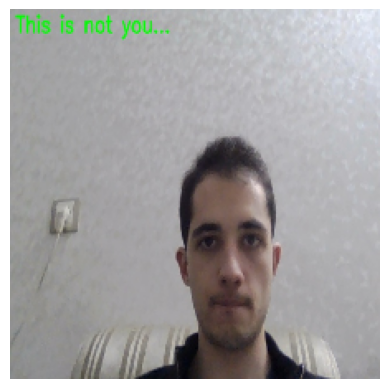

In [6]:
def main():
    def on_button_click(choice):
        if choice == "capture":
            capture_image()
        elif choice == "existing" and use_existing_image():
            pass
        else:
            return
        
        window.destroy()
        
        img_size = (224, 224)
        img_array = preprocess_image(filename, img_size)
        
        plt.imshow(img_array[0])
        plt.axis("off")
        plt.show()

    window = tk.Tk()
    window.title("Abolfazl Detector")
    window.config(bg="lightblue")
    
    center_window(window, 400, 200)

    label = tk.Label(window, text="Choose an option:", background="lightblue", font=("Consolas", 18))
    label.pack(pady=10)

    capture_button = tk.Button(window, background="#ffa343", text="Capture Image", font=("Consolas", 14), width=20, command=lambda: on_button_click("capture"))
    capture_button.pack(pady=10)

    existing_button = tk.Button(window, background="#50c878", text="Use Existing Image", font=("Consolas", 14), width=20, command=lambda: on_button_click("existing"))
    existing_button.pack(pady=10)

    window.mainloop()

if __name__ == "__main__":
    main()